## - PROYEK DATA MINING - 

### Regression Problem from Case and Cost Prediction using Random Forest Algorithm

- 12S19043 - Ignatia R. Hutagalung
- 12S19055 - Dwita Sihombing
- 12S19056 - Putri Y. Rajagukguk


## Konstruksi Data 

Tahap konstruksi data adalah bagian dari data transformasi yang berisikan representasi fitur, penentuan korelasi, dan pengintegrasian pada data. Bagian representasi fitur bertujuan untuk meningkatkan keakuratan, mengurangi ke ko,pleksitasan, dan pemilihan fitur yang optimal.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('E:/DAMI Proyek/Data_2/Data/case_cost_prediction_train.csv')

In [2]:
data.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


In [3]:
data['unit_cost'].unique()

array([3597439.78195489, 4951007.71789645,  198420.80473373, ...,
       3028610.54421769, 3629364.95209279,  295685.172972  ])

In [4]:
data['case'].unique()

array([  266,  2453,  1690, ..., 10630,  8272, 16679], dtype=int64)

In [5]:
data.describe()

,row_id,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
count,57971.000000,57971.000000,57971.000000,5.797100e+04,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.0,...,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,5.797100e+04
mean,28986.000000,246.423125,34.990081,3.562209e+05,0.041538,0.388574,0.788894,0.000380,0.281710,0.0,...,0.039899,0.004330,0.001829,0.004123,0.002018,0.228476,0.953028,0.644943,6539.418451,1.961092e+06
std,16734.930565,143.447935,5.000033,4.120323e+05,0.210390,0.660382,0.679786,0.019477,0.595284,0.0,...,0.210092,0.065659,0.042722,0.082443,0.044880,0.925357,2.225974,1.234201,17607.280021,1.889367e+06
min,1.000000,1.000000,30.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+05
25%,14493.500000,125.000000,30.000000,1.127735e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.000000,2.336742e+05
50%,28986.000000,243.000000,30.000000,1.975800e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1359.000000,6.547994e+05
75%,43478.500000,362.000000,40.000000,4.386935e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4583.000000,3.531702e+06
max,57971.000000,528.000000,40.000000,3.328509e+06,2.000000,8.000000,6.000000,1.000000,5.000000,0.0,...,2.000000,1.000000,1.000000,5.000000,1.000000,9.000000,25.000000,10.000000,333441.000000,2.690550e+07


In [6]:
data.dtypes

row_id            int64
tglpelayanan     object
kddati2           int64
tkp               int64
peserta           int64
a                 int64
b                 int64
c                 int64
cb                int64
d                 int64
ds                int64
gd                int64
hd                int64
i1                int64
i2                int64
i3                int64
i4                int64
kb                int64
kc                int64
kg                int64
ki                int64
kj                int64
kk                int64
kl                int64
km                int64
ko                int64
kp                int64
kt                int64
ku                int64
s                 int64
sa                int64
sb                int64
sc                int64
sd                int64
case              int64
unit_cost       float64
dtype: object

In [7]:
data['row_id'].duplicated().sum()

0

In [8]:
missing_value = pd.DataFrame(data.isnull().sum())

In [9]:
missing_value = missing_value.rename(columns ={'index':'Variables', 0:'Missing percentage'})
missing_value['Missing percentage'] = (missing_value['Missing percentage']/len(data))*100

In [10]:
missing_value

,Missing percentage
row_id,0.0
tglpelayanan,0.0
kddati2,0.0
tkp,0.0
peserta,0.0
a,0.0
b,0.0
c,0.0
cb,0.0
d,0.0


<AxesSubplot: >

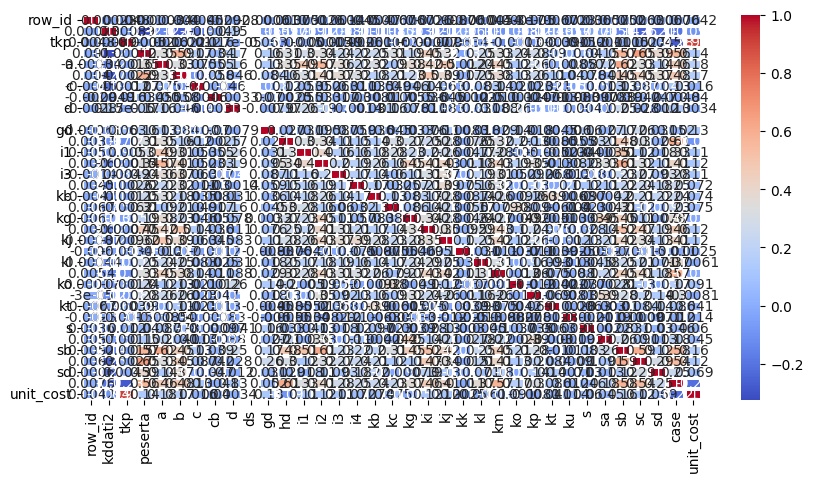

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidth = 1.5, cmap='coolwarm')

## Label Data

Tahap melakukan pelabelan pada data ini adalah bagian dari alur kerja pada persiapan data yang digunakan saat  membangun model. Pada kasus BPJS Hackaton, kategori dibagi menjadi 2 bagian yaitu data training dan validation. Terdapat regression problem sebagai berikut :
- Biaya(Unit_cost): MAE<97000, MAPE<70%
- Kasus kunjungan(Case): MAE < 900, MAPE<90%

In [12]:
data['unit_cost'].unique()

array([3597439.78195489, 4951007.71789645,  198420.80473373, ...,
       3028610.54421769, 3629364.95209279,  295685.172972  ])

In [13]:
data['case'].unique()

array([  266,  2453,  1690, ..., 10630,  8272, 16679], dtype=int64)